# Mapas interativos usando _s2sphere_ e _plotly_

# Função: Encontrar polígono S2 partindo de um ponto (lat,lng)

In [1]:
import pandas as pd
import s2sphere

def degrees_to_s2(lat, long):
    lat = float(lat)
    long = float(long)
    
    return s2sphere.CellId.from_lat_lng(s2sphere.LatLng.from_degrees(lat, long))

# Função: Encotrar vértices

In [2]:
import s2sphere
from s2sphere import CellId, LatLng, Cell

def get_corners(s2CellId_str, level):
    c1 = Cell(CellId.from_token(s2CellId_str))

    print(c1)

    c0 = LatLng.from_point(c1.get_center())  # center lat/lon of s2 cell
    v0 = LatLng.from_point(c1.get_vertex(0)) # lat/lon of upper/left corner
    v1 = LatLng.from_point(c1.get_vertex(1)) # lat/lon of lower/left corner
    v2 = LatLng.from_point(c1.get_vertex(2)) # lat/lon of lower/right corner
    v3 = LatLng.from_point(c1.get_vertex(3)) # lat/lon of upper/right corner
    print('    // s2 level ' + str(level) + ' cell id = ' + s2CellId_str)
    print('Center  = ' + str(c0))
    print('Vertex0 = ' + str(v0))
    print('Vertex1 = ' + str(v1))
    print('Vertex2 = ' + str(v2))
    print('Vertex3 = ' + str(v3))

## Input do Lat/Lng - Exemplo: Loggi Tower (-23.557398, -46.662891)

In [3]:
import numpy as np

input_latlgn = -23.557398, -46.662891 # Lat/Lng da Loggi Tower

input_latlgn = np.array(input_latlgn)

## Escolher nível de zoom

In [4]:
n_zoom = 14

## Obter vértices do polígono S2 com o nível de zoom escolhido

In [5]:
cell = s2sphere.CellId.from_lat_lng(s2sphere.LatLng.from_degrees(input_latlgn[0],input_latlgn[1])).parent(n_zoom)
cell

CellId: 94ce582d00000000

In [6]:
point0 = Cell(CellId.from_token(str(cell)[8:24]))
point0

Cell: face 4, level 14, orientation 1, id 10722604713112502272

In [7]:
point0c0 = LatLng.from_point(point0.get_center())  # center lat/lon of s2 cell
point0v0 = LatLng.from_point(point0.get_vertex(0)) # lat/lon of upper/left corner
point0v1 = LatLng.from_point(point0.get_vertex(1)) # lat/lon of lower/left corner
point0v2 = LatLng.from_point(point0.get_vertex(2)) # lat/lon of lower/right corner
point0v3 = LatLng.from_point(point0.get_vertex(3)) # lat/lon of upper/right corner

# Plotar polígonos no mapa partindo dos vértices

In [8]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [9]:
import plotly
import plotly.graph_objects as go

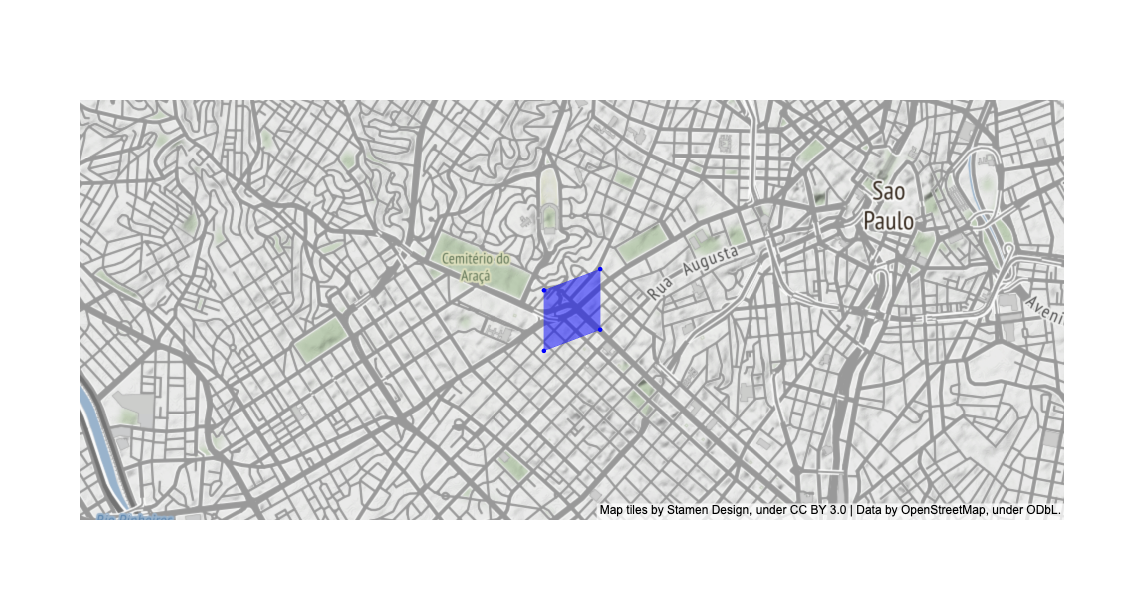

In [10]:
### Criando 1º polígono:

fig = go.Figure(go.Scattermapbox(
    fill = "toself",
    lon = [point0v0.lng().degrees, point0v1.lng().degrees, point0v2.lng().degrees, point0v3.lng().degrees], 
    lat = [point0v0.lat().degrees, point0v1.lat().degrees, point0v2.lat().degrees, point0v3.lat().degrees],
    marker = { 'size': 5, 'color': "blue" }))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': point0c0.lng().degrees, 'lat': point0c0.lat().degrees },
        'zoom': 13},width=1000, height=600,
    showlegend = False)

# Adicionando um 2º polígono ao mapa

## Input do Lat/Lng - Exemplo: MASP (-23.561585, -46.656166)

In [11]:
import numpy as np

input_latlgn = -23.561585, -46.656166 # Lat/Lng do MASP

input_latlgn = np.array(input_latlgn)

## Escolher nível de zoom

In [12]:
n_zoom = 14

## Obter vértices do polígono S2 com o nível de zoom escolhido

In [13]:
cell = s2sphere.CellId.from_lat_lng(s2sphere.LatLng.from_degrees(input_latlgn[0],input_latlgn[1])).parent(n_zoom)
cell

CellId: 94ce59cf00000000

In [14]:
point1 = Cell(CellId.from_token(str(cell)[8:24]))
point1

Cell: face 4, level 14, orientation 0, id 10722606508408832000

In [15]:
point1c0 = LatLng.from_point(point1.get_center())  # center lat/lon of s2 cell
point1v0 = LatLng.from_point(point1.get_vertex(0)) # lat/lon of upper/left corner
point1v1 = LatLng.from_point(point1.get_vertex(1)) # lat/lon of lower/left corner
point1v2 = LatLng.from_point(point1.get_vertex(2)) # lat/lon of lower/right corner
point1v3 = LatLng.from_point(point1.get_vertex(3)) # lat/lon of upper/right corner

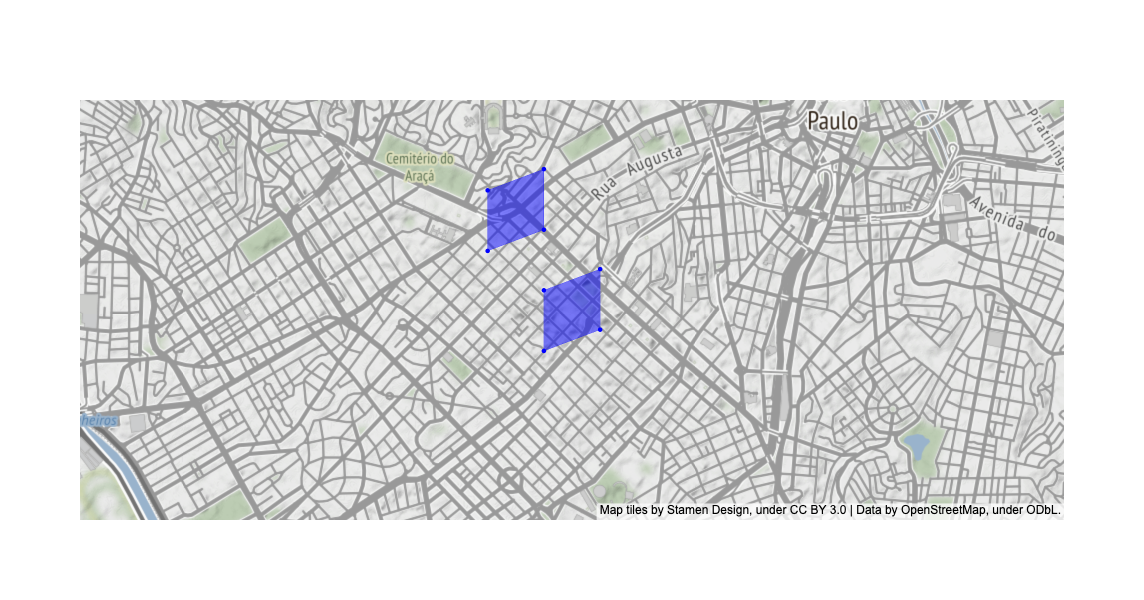

In [16]:
fig = fig.add_trace(go.Scattermapbox(
    fill = "toself",
    lon = [point1v0.lng().degrees, point1v1.lng().degrees, point1v2.lng().degrees, point1v3.lng().degrees], 
    lat = [point1v0.lat().degrees, point1v1.lat().degrees, point1v2.lat().degrees, point1v3.lat().degrees],
    marker = { 'size': 5, 'color': "blue" }))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': point1c0.lng().degrees, 'lat': point1c0.lat().degrees },
        'zoom': 13},width=1000, height=600,
    showlegend = False)